# Regularyzacja $L_1$ i $L_2$ – interpretacja geometryczna i wpływ na model
# Temat numer: 20



## Streszczenie

Celem projektu jest zbadanie wpływu regularyzacji $L_1$ (Lasso) i $L_2$ (Ridge) na modele regresji liniowej, zarówno z perspektywy teoretycznej, jak i praktycznej. Analiza skupia się na tym, jak regularyzacja wpływa na wartości współczynników, złożoność modelu oraz jego zdolność do generalizacji.

W części matematycznej przedstawiono formalne definicje funkcji celu dla metod Lasso i Ridge oraz dokonano pełnego wyprowadzenia jawnego wzoru rozwiązania dla Ridge Regression. Zinterpretowano również geometryczne różnice między normami $L_1$ i $L_2$ oraz wyjaśniono, dlaczego Lasso nie posiada rozwiązania analitycznego — co skutkuje koniecznością stosowania iteracyjnych metod optymalizacyjnych.

W eksperymentach wykorzystano dwa zestawy danych: rzeczywisty zbiór BodyFat (pochodzący z Kaggle) oraz dane syntetyczne wygenerowane funkcją `make_regression()` z kontrolowaną liczbą istotnych cech i szumem. Modele regresji porównano w wariantach bez regularyzacji (OLS) oraz z użyciem Ridge, Lasso i ElasticNet. Oceniano wartości współczynników oraz skuteczność predykcyjną na podstawie błędu MSE uzyskanego w walidacji krzyżowej.

Wyniki pokazały, że Ridge skutecznie ogranicza wielkość wszystkich współczynników, co poprawia stabilność rozwiązania. Lasso zeruje część nieistotnych zmiennych, prowadząc do rzadkich modeli, a ElasticNet pozwala łączyć zalety obu podejść. Regularyzacja prowadzi do niższego błędu predykcyjnego niż klasyczna regresja liniowa, zwłaszcza w obecności szumu lub nadmiaru zmiennych w regresji liniowej.

## 1. Definicje funkcji regularyzacyjnych $L_1$ i $L_2$

### Wprowadzenie

W regresji liniowej naszym celem jest znalezienie współczynników $ w $, które jak najlepiej dopasują model do danych wejściowych. W klasycznym podejściu (metoda najmniejszych kwadratów – OLS) minimalizujemy wyłącznie błąd dopasowania do danych:
$$
\sum_{i=1}^n (y_i - X_i w)^2
$$

Jednak w przypadku dużej liczby zmiennych lub współliniowości, model może być niestabilny lub mieć tendencję do nadmiernego dopasowania (**overfitting**).

Aby temu zapobiec, stosuje się **regularyzację**, która dodaje do funkcji celu dodatkowy składnik karzący wielkość współczynników $ w $. Pozwala to ograniczyć złożoność modelu oraz poprawić jego zdolność do generalizacji.

W zależności od zastosowanej normy, wyróżniamy dwa podstawowe podejścia:
- **Lasso ($L_1$)** – promuje rzadkie modele, zerując nieistotne współczynniki.
- **Ridge ($L_2$)** – zmniejsza wszystkie współczynniki, ale ich nie wyzerowuje.

W obu przypadkach **funkcja celu przyjmuje postać sumy błędu dopasowania oraz składnika regularyzacyjnego**, który jest ważony współczynnikiem $\lambda$. Naszym celem jest **minimalizacja tej funkcji celu**.



### Uwaga:

Chociaż w tym projekcie będziemy odnosić się głównie do **regresji liniowej**, to metody regularyzacji $L_1$ (Lasso) i $L_2$ (Ridge) są wykorzystywane szerzej – w różnych problemach optymalizacyjnych, takich jak regresja logistyczna, klasyfikacja, SVM czy sieci neuronowe.

Idea pozostaje ta sama: **dążymy do minimalizacji funkcji celu, która składa się z błędu dopasowania oraz kary za złożoność modelu**.

Regresja liniowa jest wygodnym przykładem do zobrazowania wpływu regularyzacji na współczynniki modelu.odelu.

### Oznaczenia:

- $ X \in \mathbb{R}^{n \times p} $ – macierz cech (danych wejściowych), gdzie:
  - $ n $ – liczba próbek (obserwacji),
  - $ p $ – liczba cech (zmiennych niezależnych),

$$
X =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1p} \\\\
x_{21} & x_{22} & \cdots & x_{2p} \\\\
\vdots & \vdots & \ddots & \vdots \\\\
x_{n1} & x_{n2} & \cdots & x_{np}
\end{bmatrix}
$$

- $ y \in \mathbb{R}^n $ – wektor wartości docelowych (zmiennej zależnej):

$$
y =
\begin{bmatrix}
y_1 \\\\
y_2 \\\\
\vdots \\\\
y_n
\end{bmatrix}
$$

- $ w \in \mathbb{R}^p $ – wektor współczynników regresji (parametrów modelu):

$$
w =
\begin{bmatrix}
w_1 \\\\
w_2 \\\\
\vdots \\\\
w_p
\end{bmatrix}
$$

- $ X_i $ – $ i $-ty wiersz macierzy $ X $, czyli wektor cech dla próbki $ i $,
- $ y_i $ – wartość docelowa dla próbki $ i $.

### Lasso $\big( L_1$ regularyzacja $\big)$:

Funkcja celu:
$$
\min_{w} J(w) = ||Xw - y||^2 + \lambda ||w||_1
$$

Rozwinięcie składników:
$$
||Xw - y||^2 = \sum_{i=1}^n (y_i - X_i w)^2 \quad \text{suma kwadratów reszt (RSS)}
$$
$$
||w||_1 = \sum_{j=1}^p |w_j| \quad \text{suma wartości bezwzględnych współczynników}
$$

Pełna postać funkcji celu:
$$
J(w) = \sum_{i=1}^n (y_i - X_i w)^2 + \lambda \sum_{j=1}^p |w_j|
$$

#### Interpretacja:
- Pierwszy składnik to funkcja błędu znana z klasycznej regresji liniowej (metoda najmniejszych kwadratów).
- Drugi składnik to kara, która wymusza małe lub zerowe wartości współczynników.



### Dlaczego Lasso nie ma rozwiązania analitycznego?

Funkcja celu Lasso:
$$
J(w) =  \sum_{i=1}^n (y_i - X_i w)^2 + \lambda \sum_{j=1}^p |w_j|
$$

Problem polega na tym, że funkcja $ |x| $ **nie jest różniczkowalna w zerze**.

W związku z tym:

- Gradient nie jest dobrze zdefiniowany dla wszystkich punktów.
- Nie da się zastosować zwykłego rozwiązania analitycznego jak w Ridge.
- Optymalizacja Lasso wymaga specjalnych metod, np.:
  - **coordinate descent**,
  - **LARS (Least Angle Regression)**.

Dlatego `LassoCV` i `ElasticNetCV` w `sklearn` używają **iteracyjnych algorytmów optymalizacyjnych**.

#### Wniosek:
- Lasso nie tylko wymusza rzadkość, ale też jest trudniejsze do obliczenia matematycznie.

In [1]:
import numpy as np               
import pandas as pd             
import matplotlib.pyplot as plt  
import seaborn as sns      
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNetCV, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression, load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split
from matplotlib.patches import Ellipse, Circle, Polygon  
import sympy as sp                                      

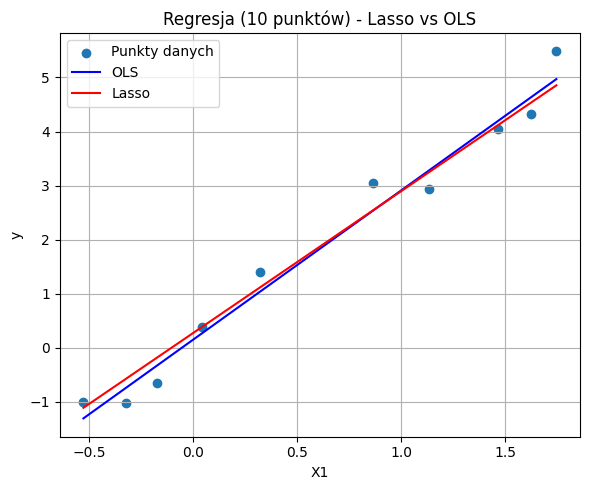

In [92]:
#Przykład
np.random.seed(1)
X_vis = np.random.randn(10, 2)
y_vis = 3 * X_vis[:, 0] + np.random.randn(10) * 0.5

# Modele
ols_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)

# Dopasowanie modeli
ols_model.fit(X_vis, y_vis)
lasso_model.fit(X_vis, y_vis)

# Wykres regresji
plt.figure(figsize=(6, 5))
plt.scatter(X_vis[:, 0], y_vis, label='Punkty danych')

plt.plot(np.sort(X_vis[:, 0]),
         ols_model.predict(np.column_stack((np.sort(X_vis[:, 0]), np.zeros_like(X_vis[:, 0])))),
         color='blue', label='OLS')

plt.plot(np.sort(X_vis[:, 0]),
         lasso_model.predict(np.column_stack((np.sort(X_vis[:, 0]), np.zeros_like(X_vis[:, 0])))),
         color='red', label='Lasso')

plt.title('Regresja (10 punktów) - Lasso vs OLS')
plt.xlabel('X1')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [86]:
print(lasso_model.alpha)

1.0


C:\Users\Tomasz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.192e+00, tolerance: 2.414e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Tomasz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.028e+00, tolerance: 2.414e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Tomasz\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.017e+00, toler

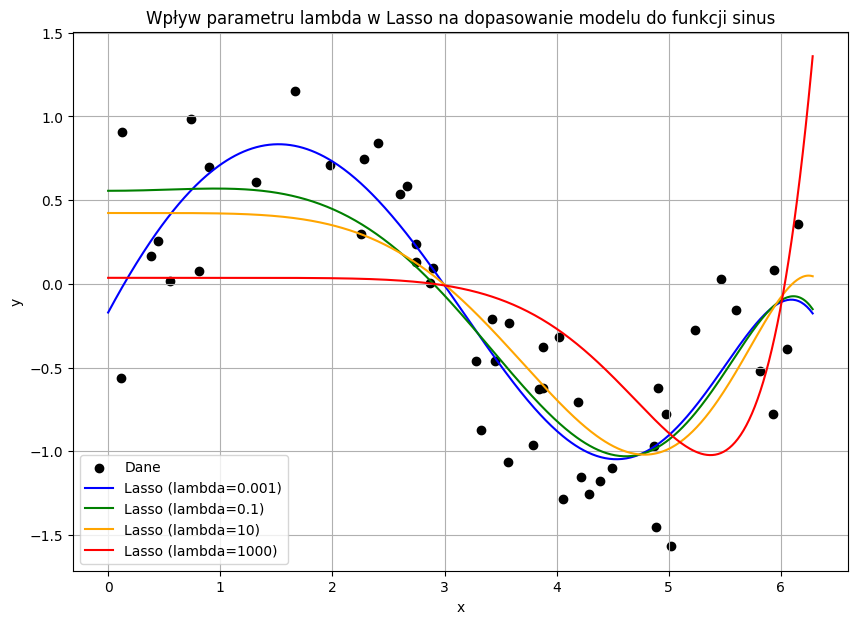

In [47]:
# Inny przykład
np.random.seed(0)
X_full = np.sort(np.random.uniform(0, 2 * np.pi, 50)).reshape(-1, 1)
y_full = np.sin(X_full).ravel() + np.random.normal(0, 0.4, X_full.shape[0])

# Siatka do predykcji (gładka krzywa)
X_plot_full = np.linspace(0, 2 * np.pi, 500).reshape(-1, 1)

# Lasso - pokazanie wpływu lambdy
alphas_lasso = [0.001, 0.1, 10, 1000]

plt.figure(figsize=(10, 7))
plt.scatter(X_full, y_full, color='black', label='Dane')

colors = ['blue', 'green', 'orange', 'red']

for alpha, color in zip(alphas_lasso, colors):
    model = make_pipeline(PolynomialFeatures(degree=9), Lasso(alpha=alpha, max_iter=10000))
    model.fit(X_full, y_full)
    y_pred = model.predict(X_plot_full)
    plt.plot(X_plot_full, y_pred, color=color, label=f'Lasso (lambda={alpha})')

plt.title('Wpływ parametru lambda w Lasso na dopasowanie modelu do funkcji sinus')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Wraz ze wzrostem wartości parametru $\lambda$ model Lasso staje się coraz prostszy — traci elastyczność, ignoruje wyższe stopnie wielomianu.

### Ridge $\big( L_2$ regularyzacja $\big)$:

Funkcja celu:
$$
\min_w J(w) = ||Xw - y||^2 + \lambda ||w||_2^2
$$

Rozwinięcie składników:
$$
||Xw - y||^2 = \sum_{i=1}^n (y_i - X_i w)^2 \quad \text{suma kwadratów reszt (RSS)}
$$
$$
||w||_2^2 = \sum_{j=1}^p w_j^2 \quad \text{suma kwadratów współczynników (norma $L_2$)}
$$

Pełna postać funkcji celu:
$$
J(w) = \sum_{i=1}^n (y_i - X_i w)^2 + \lambda \sum_{j=1}^p w_j^2
$$

#### Interpretacja:
- Pierwszy składnik to klasyczna funkcja błędu regresji liniowej (metoda najmniejszych kwadratów).
- Drugi składnik to kara za duże wartości współczynników.
- W przeciwieństwie do Lasso, Ridge **nie wyzerowuje współczynników**, ale **zmniejsza je proporcjonalnie**, stabilizując model i ograniczając przeszacowania.
- Ridge karze **kwadrat współczynników**, co powoduje, że większe współczynniki są silniej karane niż mniejsze.


### Rozwiązanie Ridge Regression – wyprowadzenie wzoru

Funkcja celu Ridge ma postać:
$$
J(w) = \|Xw - y\|^2 + \lambda \|w\|_2^2 =
$$

$$
= (Xw-y)^T(Xw-y)+\lambda w^Tw = 
$$
$$
=(Xw)^TXw-2(Xw)^Ty+y^Ty + \lambda w^Tw = 
$$
$$
=w^TX^TXw -2w^TX^Ty +y^Ty + \lambda w^Tw
$$


Aby znaleźć minimum tej funkcji, obliczamy gradient i przyrównujemy do zera:

$$
\nabla_w J(w) = 2X^TXw-2X^Ty+2\lambda w = 0 
$$

$$
X^TXw-X^Ty+\lambda w = 0 
$$

$$
(X^TX+\lambda I)w = X^Ty
$$

Zatem rozwiązanie Ridge Regression to:
$$
w = (X^T X + \lambda I)^{-1} X^T y
$$

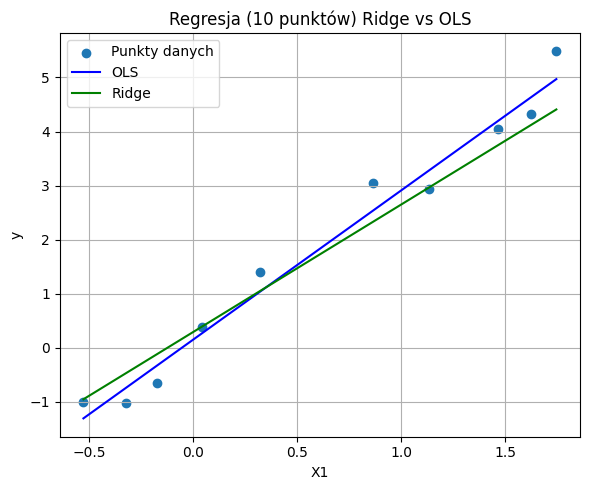

In [94]:
# Przykład
ridge_model = Ridge()

ols_model.fit(X_vis, y_vis)
ridge_model.fit(X_vis, y_vis)

# Wykres regresji względem X1
plt.figure(figsize=(6, 5))
plt.scatter(X_vis[:, 0], y_vis, label='Punkty danych')
plt.plot(np.sort(X_vis[:, 0]), ols_model.predict(np.column_stack((np.sort(X_vis[:, 0]), np.zeros_like(X_vis[:, 0])))), color='blue', label='OLS')
plt.plot(np.sort(X_vis[:, 0]), ridge_model.predict(np.column_stack((np.sort(X_vis[:, 0]), np.zeros_like(X_vis[:, 0])))), color='green', label='Ridge')
plt.title('Regresja (10 punktów) Ridge vs OLS')
plt.xlabel('X1')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Tomasz\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.40013e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


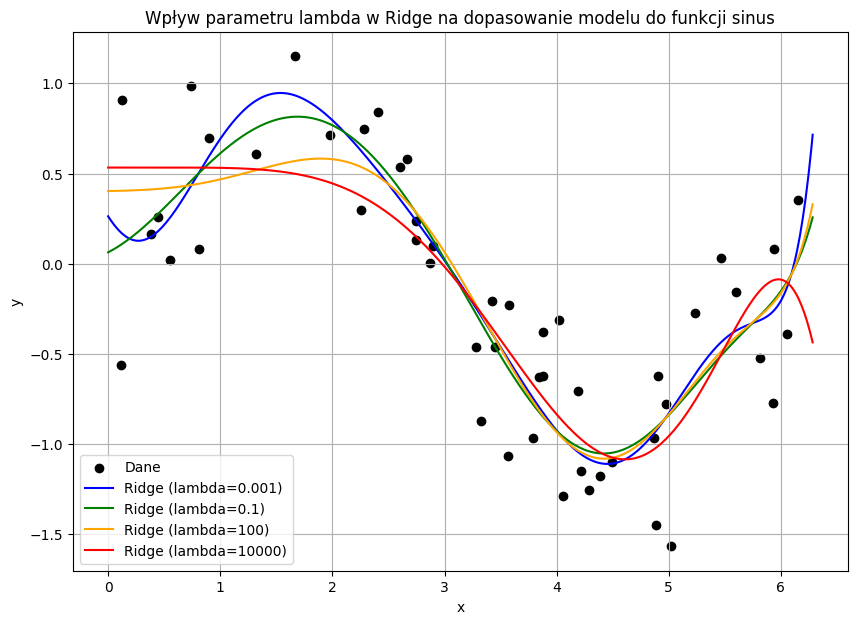

In [97]:
# Inny przykład
alphas_ridge = [0.001, 0.1, 100, 10000]

plt.figure(figsize=(10, 7))
plt.scatter(X_full, y_full, color='black', label='Dane')

colors = ['blue', 'green', 'orange', 'red']

for alpha, color in zip(alphas_ridge, colors):
    model = make_pipeline(PolynomialFeatures(degree=9), Ridge(alpha=alpha))
    model.fit(X_full, y_full)
    y_pred = model.predict(X_plot_full)
    plt.plot(X_plot_full, y_pred, color=color, label=f'Ridge (lambda={alpha})')

plt.title('Wpływ parametru lambda w Ridge na dopasowanie modelu do funkcji sinus')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Wraz ze wzrostem parametru $\lambda$ model Ridge traci elastyczność i staje się coraz prostszy. W przeciwieństwie do Lasso, nie wycina cech całkowicie, ale zachowuje małe współczynniki przy wielomianach wyższegos stopnia.

## 2. Interpretacja geometryczna regularyzacji $L_1$ i $L_2$

W klasycznej regresji liniowej (OLS) celem jest minimalizacja błędu dopasowania:
$$
J(w) = \sum_{i=1}^n (y_i - X_i w)^2
$$

Minimalizacja tej funkcji ma geometrycznie postać **krzywych eliptycznych** w przestrzeni współczynników $w$.

W przypadku dodania regularyzacji, wprowadzamy **dodatkowe ograniczenie na przestrzeń rozwiązań**, co można zobrazować jako obszar dopuszczalnych wartości dla wektora współczynników.

#### $L_1$ regularyzacja (Lasso):
- Ograniczenie: suma wartości bezwzględnych współczynników nie może przekroczyć pewnej wartości.
- Geometrycznie: **romb** (w 2D).
- Romb ma **ostre wierzchołki na osiach współrzędnych**.
- Elipsa błędu dotyka tego rombu najczęściej w punkcie, gdzie jeden ze współczynników jest dokładnie równy 0.
- Efekt: **Lasso sprzyja rozwiązaniom rzadkim**, czyli takim, gdzie część współczynników jest wyzerowana.

#### $L_2$ regularyzacja (Ridge):
- Ograniczenie: suma kwadratów współczynników nie może przekroczyć pewnej wartości.
- Geometrycznie: **okrąg (w przestrzeni 2D) lub elipsoida (w 3D i wyżej)**.
- Rozwiązanie Ridge znajduje się tam, gdzie **elipsa błędu dotyka brzegu tego okręgu**.
- **Brak ostro zakończonych wierzchołków** → współczynniki są "ściskane" (shrinkage), ale nie zerowane.

#### Porównanie:
- $L_1$ dąży do eliminowania nieistotnych cech, skutkując zerowymi współczynnikami.
- $L_2$ minimalizuje rozmiar wszystkich współczynników, ale ich nie wyzerowuje.
- ElasticNet łączy zalety obu podejść.

Poniżej przedstawiono ilustrację geometryczną tych ograniczeń.
.
metryczną tych ograniczeń.


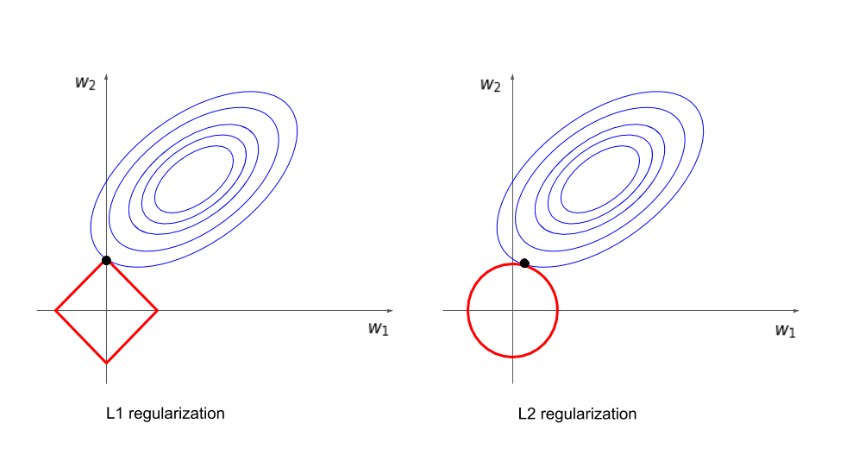

Rysunek ten pokazuje, jak różna geometria ograniczenia wpływa na punkt optymalny. W przypadku $L_1$ optymalne rozwiązanie często trafia w wierzchołek rombu – co oznacza, że jeden ze współczynników zostaje wyzerowany. W $L_2$ nie ma wierzchołków, więc współczynniki są tylko pomniejszane, ale nadal niezerowe.

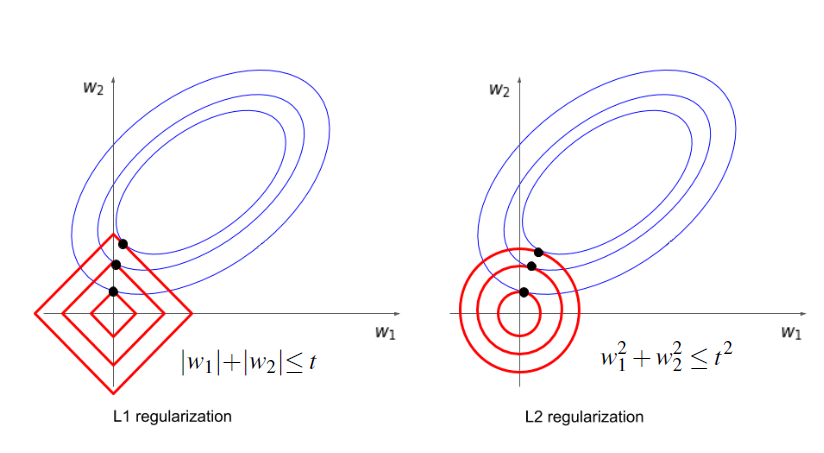

W miarę zmniejszania dopuszczalnego zakresu (zmniejszania $t$), $L_1$ przeskakuje do wierzchołków – coraz więcej współczynników przyjmuje wartość 0. W $L_2$ nadal następuje zmniejszanie współczynników, ale bez gwałtownych przeskoków.

Poniższe wykresy przedstawiają **kształt funkcji kary** w zależności od wartości współczynników regresji $w_1$ i $w_2$. Trzecia oś pokazuje wartość funkcji regularyzacyjnej:
- Dla **Lasso ($L_1$)**: $ \|w\|_1 = |w_1| + |w_2| $ 
- Dla **Ridge ($L_2$)**: $ \|w\|_2^2 = w_1^2 + w_2 ^2 $


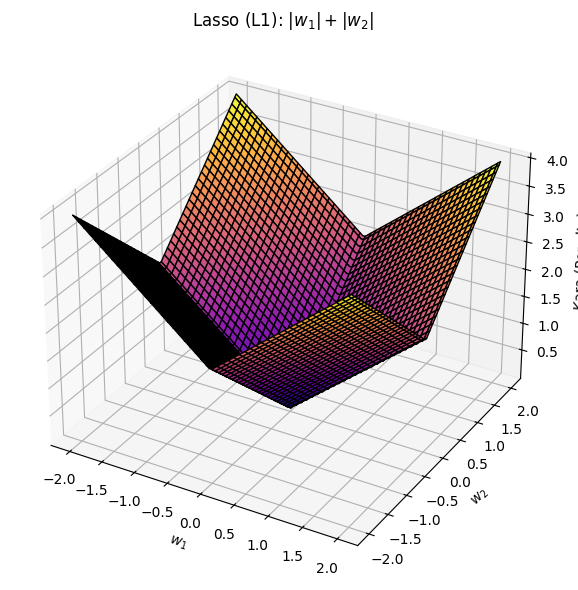

In [128]:
# Siatka współczynników
w1 = np.linspace(-2, 2, 100)
w2 = np.linspace(-2, 2, 100)
W1, W2 = np.meshgrid(w1, w2)

# Funkcja kary L1
lasso_penalty = np.abs(W1) + np.abs(W2)

# Wykres 3D – Lasso
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, lasso_penalty, cmap='plasma', edgecolor='k', alpha=0.9)
ax.set_title('Lasso (L1): $|w_1| + |w_2|$')
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
ax.set_zlabel('Kara (Penalty)')
plt.tight_layout()
plt.show()

Powyższy wykres przedstawia kształt funkcji regularyzacyjnej Lasso w przestrzeni dwóch współczynników. Wyraźnie widoczne są ostre krawędzie oraz wierzchołek w punkcie $(0, 0)$, który nie jest punktem różniczkowalnym. To właśnie ta cecha geometryczna umożliwia Lasso „ściąganie” nieistotnych współczynników dokładnie do zera.

Sama nazwa „Lasso” pochodzi od:
  > **L**east **A**bsolute **S**hrinkage and **S**election **O**perator 


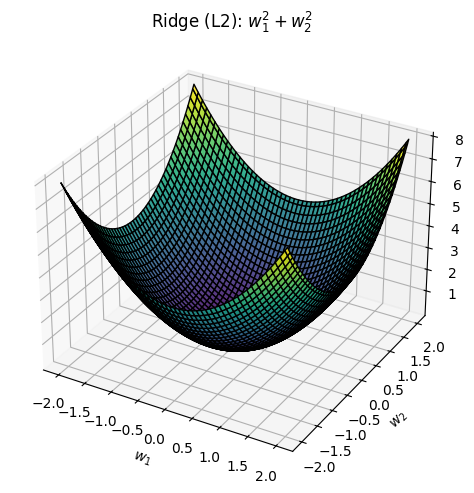

In [130]:
# Funkcja kary L2
ridge_penalty = W1**2 + W2**2

# Wykres 3D – Ridge
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, ridge_penalty, cmap='viridis', edgecolor='k', alpha=0.9)
ax.set_title('Ridge (L2): $w_1^2 + w_2^2$')
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
ax.set_zlabel('Kara (Penalty)')
plt.tight_layout()
plt.show()

- Powierzchnia kary ma kształt **paraboloidy**.
- Funkcja jest **różniczkowalna w każdym punkcie**, co sprawia, że jej minimum jest stabilne i łatwe do znalezienia.
- **Nazwa „ridge” (grzbiet)** pochodzi z obserwacji, że funkcja błędu przy współlinowości ma postać wąskiego grzbietu. 

## 3. Zastosowanie do regresji

W tej sekcji przedstawione zostanie zastosowanie regularyzacji w praktycznych problemach regresji liniowej:

- **Przykład 1** – rzeczywisty zbiór danych dotyczący składu ciała (BodyFat).
- **Przykład 2** – dane syntetyczne wygenerowane losowo, z kontrolowanym poziomem szumu.


### Przykład 1

Źródło: [Kaggle – Body Fat Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset)

Zbiór danych zawiera informacje o budowie ciała 252 mężczyzn, m.in.:

- **BodyFat** – zawartość tłuszczu w ciele (%),
- **Density** – gęstość ciała (g/cm³),
- **Age, Weight, Height** – podstawowe cechy,
- **Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, Wrist** – szczegółowe obwody poszczególnych części ciała.

W analizie usuwamy następujące kolumny:

- **BodyFat** – to nasza zmienna objaśniana $y$.
- **Density** – silnie skorelowana z BodyFat.
- **Abdomen** – choć jest jedną z najważniejszych cech, to usuwamy ją celowo, aby nie dominowała wyników i aby wyraźniej uwidocznić różnice między metodami regularyzacyjnymi.

Po tej operacji pozostaje 13 cech wejściowych, które posłużą do uczenia modeli regresji.

In [3]:
df = pd.read_csv('C:/Users/Tomasz/Desktop/MFoDL/bodyfat.csv')

print(df.head())

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


In [5]:
X = df.drop(['BodyFat','Density','Abdomen'], axis=1)
y = df['BodyFat']
feature_names = X.columns.tolist()

In [7]:
print(X.head())

   Age  Weight  Height  Neck  Chest    Hip  Thigh  Knee  Ankle  Biceps  \
0   23  154.25   67.75  36.2   93.1   94.5   59.0  37.3   21.9    32.0   
1   22  173.25   72.25  38.5   93.6   98.7   58.7  37.3   23.4    30.5   
2   22  154.00   66.25  34.0   95.8   99.2   59.6  38.9   24.0    28.8   
3   26  184.75   72.25  37.4  101.8  101.2   60.1  37.3   22.8    32.4   
4   24  184.25   71.25  34.4   97.3  101.9   63.2  42.2   24.0    32.2   

   Forearm  Wrist  
0     27.4   17.1  
1     28.9   18.2  
2     25.2   16.6  
3     29.4   18.2  
4     27.7   17.7  


### Przykład 2


Dane zostały wygenerowane za pomocą funkcji `make_regression()` z biblioteki `sklearn.datasets`.

In [11]:
# Generowanie danych syntetycznych z szumem
np.random.seed(0)
X_2, y_2, coef_2 = make_regression(
    n_samples=100,
    n_features=10,
    n_informative=3,
    noise=50.0,
    coef=True
)

feature_names_2 = [f"x{i}" for i in range(X_2.shape[1])]
df2 = pd.DataFrame(X_2, columns=feature_names_2)
df2['target'] = y_2

Parametry:

- 100 przykładów (`n_samples=100`),
- 10 cech (`n_features=10`),
- tylko 3 z nich faktycznie wpływają na wynik (`n_informative=3`),
- dodany losowy szum (`noise=50.0`).

Wygenerowane dane pozwalają zaobserwować, jak działają metody regularyzacyjne w sytuacji, gdy:

- tylko niektóre zmienne są istotne,
- model narażony jest na przeuczenie (overfitting),
- cechy nie są ze sobą silnie skorelowane, ale pojawia się przypadkowy szum.

## 4. Porównanie wpływu regularyzacji na współczynniki

### Przykład 1

W tej części porównamy wartości współczynników regresji oraz błąd MSE uzyskany przez trzy modele:

- **Regresja liniowa (OLS)** – bez regularyzacji,
- **Ridge regression $\big(L_2\big)$** – z parametrem $ \lambda = 0.1$ oraz optymalnym dobranym przez `RidgeCV`,
- **Lasso regression $\big(L_1\big)$** – również dla $ \lambda = 0.1 $ oraz dobranego przez `LassoCV`.

<Figure size 1200x600 with 0 Axes>

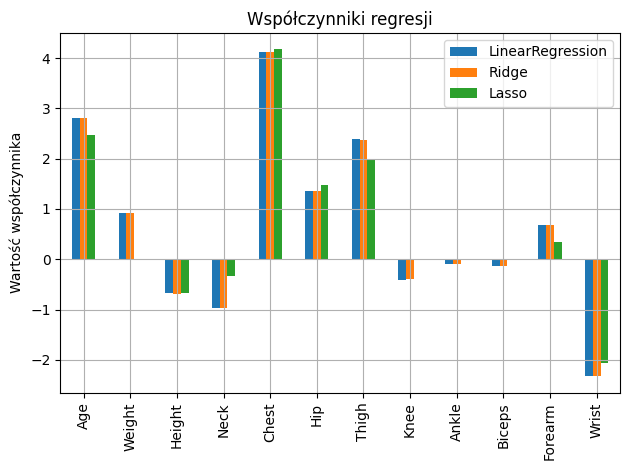

Porównanie MSE:
LinearRegression: 26.48
Ridge: 26.48
Lasso: 26.73


In [17]:
# Standaryzacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modele parametrami 0.1
from sklearn.linear_model import Ridge, Lasso
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(0.1),
    "Lasso": Lasso(0.1)
}

results = {}
coefs = {}

for name, model in models.items():
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    mse = mean_squared_error(y, y_pred)
    results[name] = mse
    coefs[name] = model.coef_

coef_df = pd.DataFrame(coefs, index=feature_names)

plt.figure(figsize=(12, 6))
coef_df.plot(kind='bar')
plt.title("Współczynniki regresji")
plt.ylabel("Wartość współczynnika")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Porównanie MSE:")
for model_name, mse in results.items():
    print(f"{model_name}: {mse:.2f}")


Na pierwszym wykresie widzimy, że:

- Wartości współczynników są bardzo zbliżone między OLS, Ridge i Lasso.
- Przy domyślnym wyborze $\lambda$ wpływ regularyzacji na współczynniki jest niewielki.

Teraz przeprowadzimy dobór optymalnych wartości parametru regularyzacyjnego $ \lambda $ z wykorzystaniem walidacji krzyżowej (`RidgeCV` i `LassoCV`). Użyta siatka zawiera 1000 równomiernie rozłożonych wartości w zakresie $ \lambda \in [0.0001, 100] $.

C:\Users\Tomasz\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(



Najlepsze wartości lambdy:
RidgeCV Lambda: 30.930999999999997
LassoCV Lambda: 0.3004


<Figure size 1400x600 with 0 Axes>

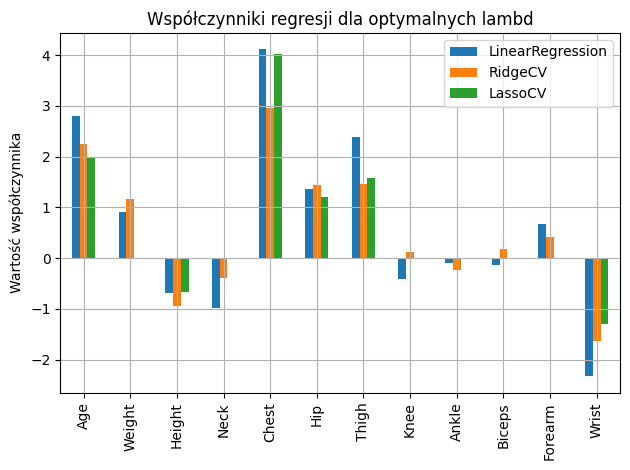


Porównanie MSE:
LinearRegression: 26.48
RidgeCV: 27.30
LassoCV: 27.75


In [21]:
# Dobór hiperparametrów
alphas = np.linspace(0.0001, 100, 1000)

ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
lasso_cv = LassoCV(alphas=alphas, cv=10, max_iter=10000)
linear = LinearRegression()

ridge_cv.fit(X_scaled, y)
lasso_cv.fit(X_scaled, y)
linear.fit(X_scaled, y)

models_all = {
    "LinearRegression": linear,
    "RidgeCV": ridge_cv,
    "LassoCV": lasso_cv
}

results_all = {}
coefs_all = {}

for name, model in models_all.items():
    y_pred = model.predict(X_scaled)
    mse = mean_squared_error(y, y_pred)
    results_all[name] = mse
    coefs_all[name] = model.coef_

print("\nNajlepsze wartości lambdy:")
print(f"RidgeCV Lambda: {ridge_cv.alpha_}")
print(f"LassoCV Lambda: {lasso_cv.alpha_}")

coef_all_df = pd.DataFrame(coefs_all, index=feature_names)

plt.figure(figsize=(14, 6))
coef_all_df.plot(kind='bar')
plt.title("Współczynniki regresji dla optymalnych lambd")
plt.ylabel("Wartość współczynnika")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nPorównanie MSE:")
for model_name, mse in results_all.items():
    print(f"{model_name}: {mse:.2f}")


Po doborze optymalnych wartości $\lambda $ przez walidację krzyżową, zauważamy:

- **Ridge**: współczynniki ulegają **większemu spłaszczeniu** – szczególnie te mniej istotne.
- **Lasso**: niektóre współczynniki zostały całkowicie **wyzerowane**.gi.


Na wykresach pokazano, jak zmieniają się wartości współczynników w miarę zwiększania parametru $ \lambda $, który kontroluje siłę regularyzacji.

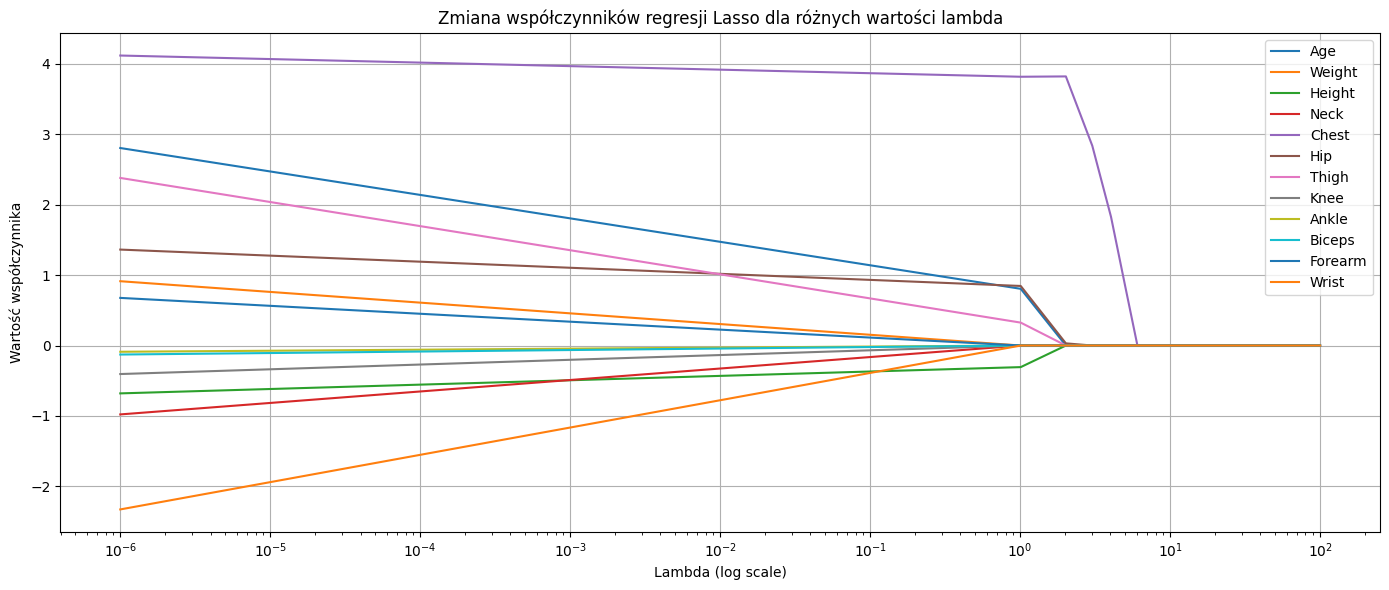

In [24]:
alphas = np.linspace(1e-6, 100, 100)

coefficients = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, y)
    coefficients.append(lasso.coef_)

coef_df = pd.DataFrame(coefficients, columns=feature_names)

plt.figure(figsize=(14, 6))

for i, feature in enumerate(feature_names):
    plt.plot(alphas, coef_df[feature], label=feature)

plt.xscale('log')  
plt.xlabel('Lambda (log scale)')
plt.ylabel('Wartość współczynnika')
plt.title('Zmiana współczynników regresji Lasso dla różnych wartości lambda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

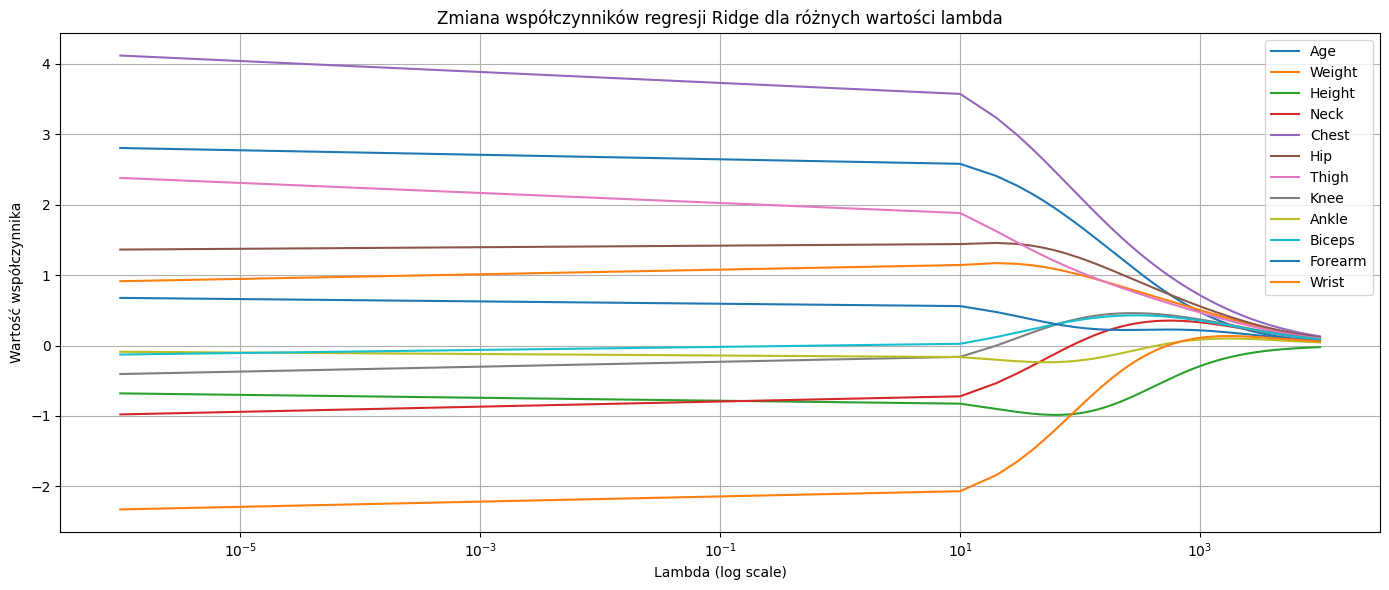

In [25]:
alphas = np.linspace(1e-6, 10000, 1000)

coefficients = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y)
    coefficients.append(ridge.coef_)

coef_df = pd.DataFrame(coefficients, columns=feature_names)

plt.figure(figsize=(14, 6))

for i, feature in enumerate(feature_names):
    plt.plot(alphas, coef_df[feature], label=feature)

plt.xscale('log')  
plt.xlabel('Lambda (log scale)')
plt.ylabel('Wartość współczynnika')
plt.title('Zmiana współczynników regresji Ridge dla różnych wartości lambda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Przykład 2

<Figure size 1200x600 with 0 Axes>

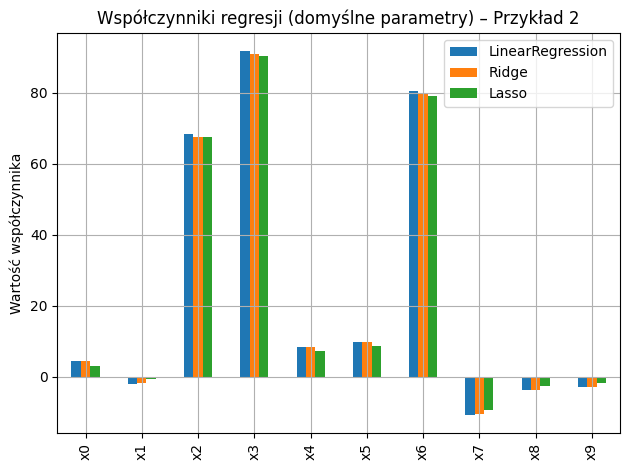

Porównanie MSE – Przykład 2:
LinearRegression: 2377.15
Ridge: 2379.26
Lasso: 2389.50
Ridge alpha (domyślne): 1.0
Lasso alpha (domyślne): 1.0


In [47]:
# Standaryzacja danych
scaler_2 = StandardScaler()
X_scaled_2 = scaler_2.fit_transform(X_2)

# 1. Modele z domyślnymi parametrami
models_2 = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

results_2 = {}
coefs_2 = {}

for name, model in models_2.items():
    model.fit(X_scaled_2, y_2)
    y_pred_2 = model.predict(X_scaled_2)
    mse = mean_squared_error(y_2, y_pred_2)
    results_2[name] = mse
    coefs_2[name] = model.coef_

coef_df_2 = pd.DataFrame(coefs_2, index=feature_names_2)

plt.figure(figsize=(12, 6))
coef_df_2.plot(kind='bar')
plt.title("Współczynniki regresji (domyślne parametry) – Przykład 2")
plt.ylabel("Wartość współczynnika")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Porównanie MSE – Przykład 2:")
for model_name, mse in results_2.items():
    print(f"{model_name}: {mse:.2f}")




print(f"Ridge alpha (domyślne): {models_2['Ridge'].alpha}")
print(f"Lasso alpha (domyślne): {models_2['Lasso'].alpha}")

- Widać wyraźnie, że współczynnki $x_2$, $x_3$ i $x_6$ są dominujące – co jest zgodne z założeniami generowania danych.
- Pozostałe współczynniki powinny być bliskie zeru.
- Jednak zarówno Ridge, jak i Lasso przy domyślnym $\lambda$ nie wyzerowują tych nieistotnych cech.
- Wszystkie modele (OLS, Ridge, Lasso) zachowują się podobnie.

C:\Users\Tomasz\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(



Najlepsze wartości lambdy – Przykład 2:
RidgeCV Lambda: 1.1012
LassoCV Lambda: 5.205299999999999


<Figure size 1400x600 with 0 Axes>

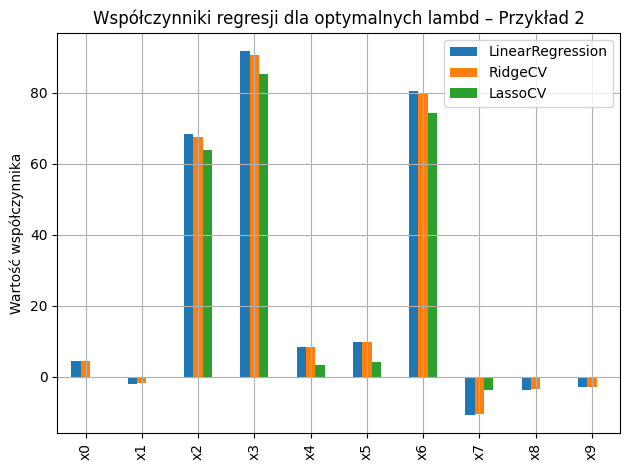


Porównanie MSE (optymalne lambda) – Przykład 2:
LinearRegression: 2377.15
RidgeCV: 2379.71
LassoCV: 2591.24


In [49]:
# 2. Modele z optymalnym doborem alpha
alphas_2 = np.linspace(0.0001, 100, 1000)

ridge_cv_2 = RidgeCV(alphas=alphas_2, store_cv_values=True)
lasso_cv_2 = LassoCV(alphas=alphas_2, cv=5, max_iter=10000)
linear_2 = LinearRegression()

ridge_cv_2.fit(X_scaled_2, y_2)
lasso_cv_2.fit(X_scaled_2, y_2)
linear_2.fit(X_scaled_2, y_2)

models_all_2 = {
    "LinearRegression": linear_2,
    "RidgeCV": ridge_cv_2,
    "LassoCV": lasso_cv_2
}

results_all_2 = {}
coefs_all_2 = {}

for name, model in models_all_2.items():
    y_pred = model.predict(X_scaled_2)
    mse = mean_squared_error(y_2, y_pred)
    results_all_2[name] = mse
    coefs_all_2[name] = model.coef_

print("\nNajlepsze wartości lambdy – Przykład 2:")
print(f"RidgeCV Lambda: {ridge_cv_2.alpha_}")
print(f"LassoCV Lambda: {lasso_cv_2.alpha_}")

coef_all_df_2 = pd.DataFrame(coefs_all_2, index=feature_names_2)

plt.figure(figsize=(14, 6))
coef_all_df_2.plot(kind='bar')
plt.title("Współczynniki regresji dla optymalnych lambd – Przykład 2")
plt.ylabel("Wartość współczynnika")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nPorównanie MSE (optymalne lambda) – Przykład 2:")
for model_name, mse in results_all_2.items():
    print(f"{model_name}: {mse:.2f}")

Po doborze optymalnych wartości $\lambda$:

- **RidgeCV**:
  - Współczynniki są bardzo zbliżone do tych z regresji liniowej.
  - Model nie dokonuje selekcji cech – tylko **łagodzi wpływ zmiennych mniej istotnych**, ale żadnej z nich nie eliminuje.
- **LassoCV**:
  - Część współczynników została **wyzerowana**.
  - Model dokonał **selekcji cech**, ignorując zmienne nieistotne, co jest zgodne z konstrukcją danych.

## 5. Ocena skuteczności predykcyjnej

W tej sekcji ocenimy, jak różne modele regresji zachowują się pod względem zdolności predykcyjnej na nowych danych. W tym celu stosujemy **walidację krzyżową**, której miarą jest średni błąd MSE.

### Przykład 1

In [51]:
# Cross-validation na zbiorze Bodyfat
from sklearn.model_selection import cross_val_score
np.random.seed(0)
linear_pipe = make_pipeline(StandardScaler(), LinearRegression())
ridge_pipe = make_pipeline(StandardScaler(), RidgeCV(alphas=np.linspace(0.0001, 100, 1000),cv=10))
lasso_pipe = make_pipeline(StandardScaler(), LassoCV(alphas=np.linspace(0.0001, 100, 1000), cv=10, max_iter=10000))

scores_3 = {
    "LinearRegression": -cross_val_score(linear_pipe, X, y, cv=10, scoring='neg_mean_squared_error').mean(),
    "RidgeCV": -cross_val_score(ridge_pipe, X, y, cv=10, scoring='neg_mean_squared_error').mean(),
    "LassoCV": -cross_val_score(lasso_pipe, X, y, cv=10, scoring='neg_mean_squared_error').mean()
}

print("\nMSE (cross-validation) – Bodyfat:")
for model, score in scores_3.items():
    print(f"{model}: {score:.2f}")


MSE (cross-validation) – Bodyfat:
LinearRegression: 39.94
RidgeCV: 35.35
LassoCV: 36.84


**Wnioski**:

- Zarówno **RidgeCV**, jak i **LassoCV** osiągnęły **niższy błąd walidacyjny** niż regresja liniowa.
- Oznacza to, że **dodanie składnika regularyzacyjnego poprawiło zdolność modelu do generalizacji**.
- **RidgeCV** uzyskał najniższy błąd – może to sugerować, że wszystkie cechy są w pewnym stopniu istotne i nie należy ich zerować, lecz jedynie delikatnie wygładzić.

### Przykład 2

In [52]:
# Cross-validation na danych syntetycznych
linear_pipe_2 = make_pipeline(StandardScaler(), LinearRegression())
ridge_pipe_2 = make_pipeline(StandardScaler(), RidgeCV(alphas=np.linspace(0.0001, 100, 1000),cv=5))
lasso_pipe_2 = make_pipeline(StandardScaler(), LassoCV(alphas=np.linspace(0.0001, 100, 1000), cv=5, max_iter=10000))

scores_2 = {
    "LinearRegression": -cross_val_score(linear_pipe_2, X_2, y_2, cv=5, scoring='neg_mean_squared_error').mean(),
    "RidgeCV": -cross_val_score(ridge_pipe_2, X_2, y_2, cv=5, scoring='neg_mean_squared_error').mean(),
    "LassoCV": -cross_val_score(lasso_pipe_2, X_2, y_2, cv=5, scoring='neg_mean_squared_error').mean()
}

print("\nMSE (cross-validation) – Przykład 2:")
for model, score in scores_2.items():
    print(f"{model}: {score:.2f}")


MSE (cross-validation) – Przykład 2:
LinearRegression: 3365.35
RidgeCV: 3356.22
LassoCV: 3233.57


**Wniosek:**.
- Lasso osiąga zauważalnie niższy błąd, co potwierdza jego skuteczność w danyh cgdzie  (tylko część cech jest istota).
- Ridge i regresja liniowa uzyskują podobne wyniki, co sugeruje, że L2 regularyzacja nie była wystarczająco silna, by wyraźnie poprawić generalizacjdla takichch danych.

## 6. Elastic Net – połączenie $L_1$ i $L_2$

### Wprowadzenie teoretyczne

**Elastic Net** łączy zalety dwóch podejść regularyzacyjnych:
- **Lasso $\big(L_1\big)$** – selekcjonuje zmienne, zerując nieistotne współczynniki.
- **Ridge $\big(L_2\big)$** – stabilizuje model i tłumi wielkość współczynników.

Funkcja celu w Elastic Net ma postać:

$$
J(w) = \|Xw - y\|^2 + \lambda_1 \|w\|_1 + \lambda_2 \|w\|_2^2
$$

lub w bardziej popularnej formie z parametrem mieszanym:

$$
J(w) = \|Xw - y\|^2 + \alpha \cdot \left( \rho \|w\|_1 + (1 - \rho) \|w\|_2^2 \right)
$$

gdzie:

- $ \alpha $ – kontroluje ogólną siłę regularyzacji (jak w Lasso/Ridge),
- $ \rho \in [0, 1] $ (oznaczany jako `l1_ratio` w `sklearn`) – określa proporcję $L_1$ i $L_2$,
  - $ \rho = 1 $ → czyste Lasso,
  - $\rho = 0 $ → czyste Ridge,
  - $\rho = 0.5 $ → równe połączenie obu.

### Przykład 1


W bibliotece `scikit-learn`, model `ElasticNetCV` automatycznie:

- testuje różne wartości `alpha` (siła regularyzacji),
- testuje różne wartości `l1_ratio` $\big($mieszanka $L_1$/$L_2$ $\big)$,
- wybiera kombinację, która minimalizuje błąd walidacyjny.

---

C:\Users\Tomasz\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(



Najlepsze wartości alpha:
RidgeCV alpha: 30.930999999999997
LassoCV alpha: 0.3004
ElasticNetCV alpha: 0.3004, l1_ratio: 1.0


<Figure size 1400x600 with 0 Axes>

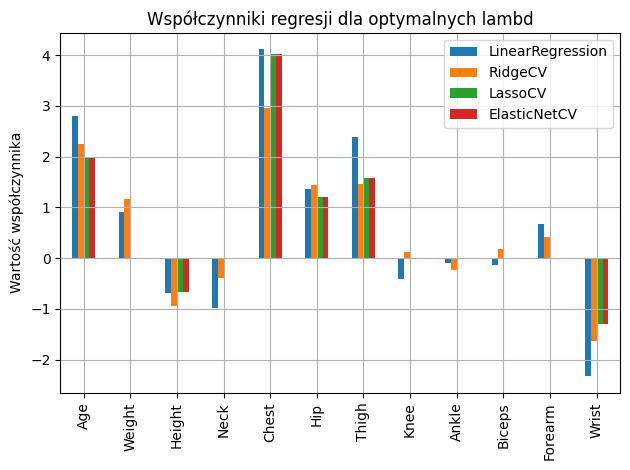

In [57]:
# Dobór hiperparametrów
np.random.seed(0)
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet
alphas = np.linspace(0.0001, 100, 1000)
l1_ratio = np.linspace(0.05, 1, 20)

ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
linear = LinearRegression()
elastic_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratio, cv=5, max_iter=10000)


ridge_cv.fit(X_scaled, y)
lasso_cv.fit(X_scaled, y)
linear.fit(X_scaled, y)
elastic_cv.fit(X_scaled, y)

models_all = {
    "LinearRegression": linear,
    "RidgeCV": ridge_cv,
    "LassoCV": lasso_cv,
    "ElasticNetCV": elastic_cv
}


results_all = {}
coefs_all = {}

for name, model in models_all.items():
    y_pred = model.predict(X_scaled)
    mse = mean_squared_error(y, y_pred)
    results_all[name] = mse
    coefs_all[name] = model.coef_

print("\nNajlepsze wartości alpha:")
print(f"RidgeCV alpha: {ridge_cv.alpha_}")
print(f"LassoCV alpha: {lasso_cv.alpha_}")
print(f"ElasticNetCV alpha: {elastic_cv.alpha_}, l1_ratio: {elastic_cv.l1_ratio_}")

coef_all_df = pd.DataFrame(coefs_all, index=feature_names)

plt.figure(figsize=(14, 6))
coef_all_df.plot(kind='bar')
plt.title("Współczynniki regresji dla optymalnych lambd")
plt.ylabel("Wartość współczynnika")
plt.grid(True)
plt.tight_layout()
plt.show()

Na powyższym wykresie porównano wartości współczynników dla wszystkich czterech modeli:  
LinearRegression, RidgeCV, LassoCV, ElasticNetCV.

- Współczynniki Ridge są wygładzone.
- Lasso i ElasticNet zerują część mniej istotnych cech.
- ElasticNet z parametrem `l1_ratio = 1.0` działa identycznie jak Lasso.

In [58]:
# Cross-validation na zbiorze Bodyfat
np.random.seed(0)
linear_pipe = make_pipeline(StandardScaler(), LinearRegression())
ridge_pipe = make_pipeline(StandardScaler(), RidgeCV(alphas=np.linspace(0.0001, 100, 1000),cv=10))
lasso_pipe = make_pipeline(StandardScaler(), LassoCV(alphas=np.linspace(0.0001, 100, 1000), cv=10, max_iter=10000))
elasticnet_pipe=  make_pipeline(StandardScaler(), ElasticNetCV(alphas=alphas, l1_ratio=l1_ratio, cv=10, max_iter=10000))

scores_3 = {
    "LinearRegression": -cross_val_score(linear_pipe, X, y, cv=10, scoring='neg_mean_squared_error').mean(),
    "RidgeCV": -cross_val_score(ridge_pipe, X, y, cv=10, scoring='neg_mean_squared_error').mean(),
    "LassoCV": -cross_val_score(lasso_pipe, X, y, cv=10, scoring='neg_mean_squared_error').mean(),
    "ElasticNet": -cross_val_score(elasticnet_pipe, X, y, cv=10, scoring='neg_mean_squared_error').mean()
}

print("\nMSE (cross-validation) – Bodyfat:")
for model, score in scores_3.items():
    print(f"{model}: {score:.2f}")


MSE (cross-validation) – Bodyfat:
LinearRegression: 39.94
RidgeCV: 35.35
LassoCV: 36.84
ElasticNet: 36.51


**Wnioski:**

- Najniższy błąd MSE w walidacji krzyżowej osiągnął model **RidgeCV**, co sugeruje, że w tym przypadku **regularyzacja $L_2$** najlepiej wspiera zdolność generalizacji modelu.
- Model **ElasticNetCV** dobrał parametr `l1_ratio = 1.0`, co oznacza, że końcowo zachowywał się jak czysty model Lasso — czyli preferował pełną regularyzację $L_1$, ignorując komponent $L_2$.
- Choć **ElasticNetCV** nie przewyższył Ridge'a w tym przypadku, daje większą elastyczność, umożliwiając balans między selekcją zmiennych $\big(L_1\big)$ a stabilizacją modelu $\big(L_2 \big).$
- Wszystkie trzy modele regularyzacyjne (Ridge, Lasso, ElasticNet) przewyższyły klasyczną regresję liniową pod względem błędu predykcyjnego, co potwierdza wartość regularyzacji w praktyce.